In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import chart_studio.plotly as py
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #For plotly to work in jupyter notebook
init_notebook_mode(connected=True) #For plotly to work in jupyter notebook

import cufflinks as cf
cf.go_offline() #For everything to work locally

import plotly.graph_objects as go 

%matplotlib inline

**Basics**

<Axes: >

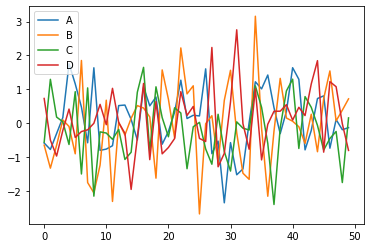

In [5]:
array1 = np.random.randn(50,4) #50 Rows and 4 columns
data = pd.DataFrame(array1, columns = ['A','B','C','D'])
data.head()
data.plot() #from plotly

In [6]:
data.iplot() #from plotly - this is an interactive plot - Top right you can see various options

**Line Plot**

In [7]:
df_stocks = px.data.stocks() #Like seaborn, plotly also has datasets by default
#Plotly data packages documentation - https://plotly.com/python-api-reference/generated/plotly.data.html
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [9]:
#A basic plot with x, y, labels and titles
px.line(df_stocks, x = 'date', y = 'GOOG', labels= {'x':'Date', 'y':'Google'}, title ='Stocks')

In [10]:
#To add more dependent variables
px.line(df_stocks, x = 'date', y = ['GOOG','AAPL'], labels= {'x':'Date', 'y':'Google'}, title ='Stocks')

In [11]:
#Create graph objescts from custom plots
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AAPL, mode = 'lines', name = 'Apple')) #Data argument is not available check in the description
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AMZN, mode = 'lines', name = 'Amazon')) #x,y,mode,legend
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.GOOG, mode = 'lines', name = 'Google')) 

In [12]:
#Change line styles
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AAPL, mode = 'lines', name = 'Apple'))
#Just line / line+marker
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AMZN, mode = 'lines+markers', name = 'Amazon')) 
#Since there are no options with mode, lets change line properties
line_properties = dict(color = 'firebrick', width = 2, dash = 'dashdot')
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.GOOG, mode = 'lines', name = 'Google', line = line_properties)) 

#Adding Title and labels
fig.update_layout(title = 'Stocks between 2018 and 2020', xaxis_title = 'Period', yaxis_title = 'Stocks') 
#Only if this statement is there, the graph will be updated atleast a fig.update_layout() without any params

In [13]:
#Change line styles
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AAPL, mode = 'lines', name = 'Apple'))
#Just line / line+marker
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AMZN, mode = 'lines+markers', name = 'Amazon')) 
#Since there are no options with mode, lets change line properties
line_properties = dict(color = 'firebrick', width = 2, dash = 'dashdot')
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.GOOG, mode = 'lines', name = 'Google', line = line_properties)) 

#More specific details on axes
x_axis_properties = dict( showline = True,
                        showgrid = True,
                        showticklabels = True,
                        linecolor = 'rgb(204,204,204)',
                        linewidth = 2,
                        ticks = 'outside',
                        tickfont = dict(family ='Arial', size = 12, color = 'rgb(82,82,82)'))
y_axis_properties = dict( showgrid = True,
                        zeroline = False,
                        showline = False,
                        showticklabels = True)
margin_properties = dict(autoexpand = False, 
                         l = 100, 
                         r = 20, 
                         t = 10,)

fig.update_layout(xaxis = x_axis_properties,
                  yaxis= y_axis_properties,
                 margin = margin_properties,
                autosize = False,
                  showlegend = False,
                  plot_bgcolor='Black' #Remember when this is white - you wont be able to see any changes coz grid line by default is also white 
                 ) 

**3D Line Plot**

In [5]:
flights = sns.load_dataset('flights')
fig = px.line_3d(flights, x = 'year', y ='month', z = 'passengers',
                   color = 'year')
fig